In [24]:
import pandas as pd
from knn import KNN
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/penguins_com_outliers.csv')

# One-hot encoding
df = pd.get_dummies(df, columns=['island'])

df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,0.010414,0.004981,0.048207,0.998771,False,False,True
1,Adelie,0.010382,0.004573,0.048886,0.998740,False,False,True
2,Adelie,0.012377,0.005528,0.059887,0.998113,False,False,True
3,Adelie,0.010620,0.005585,0.055851,0.998367,False,False,True
4,Adelie,0.010752,0.005636,0.051981,0.998574,False,False,True


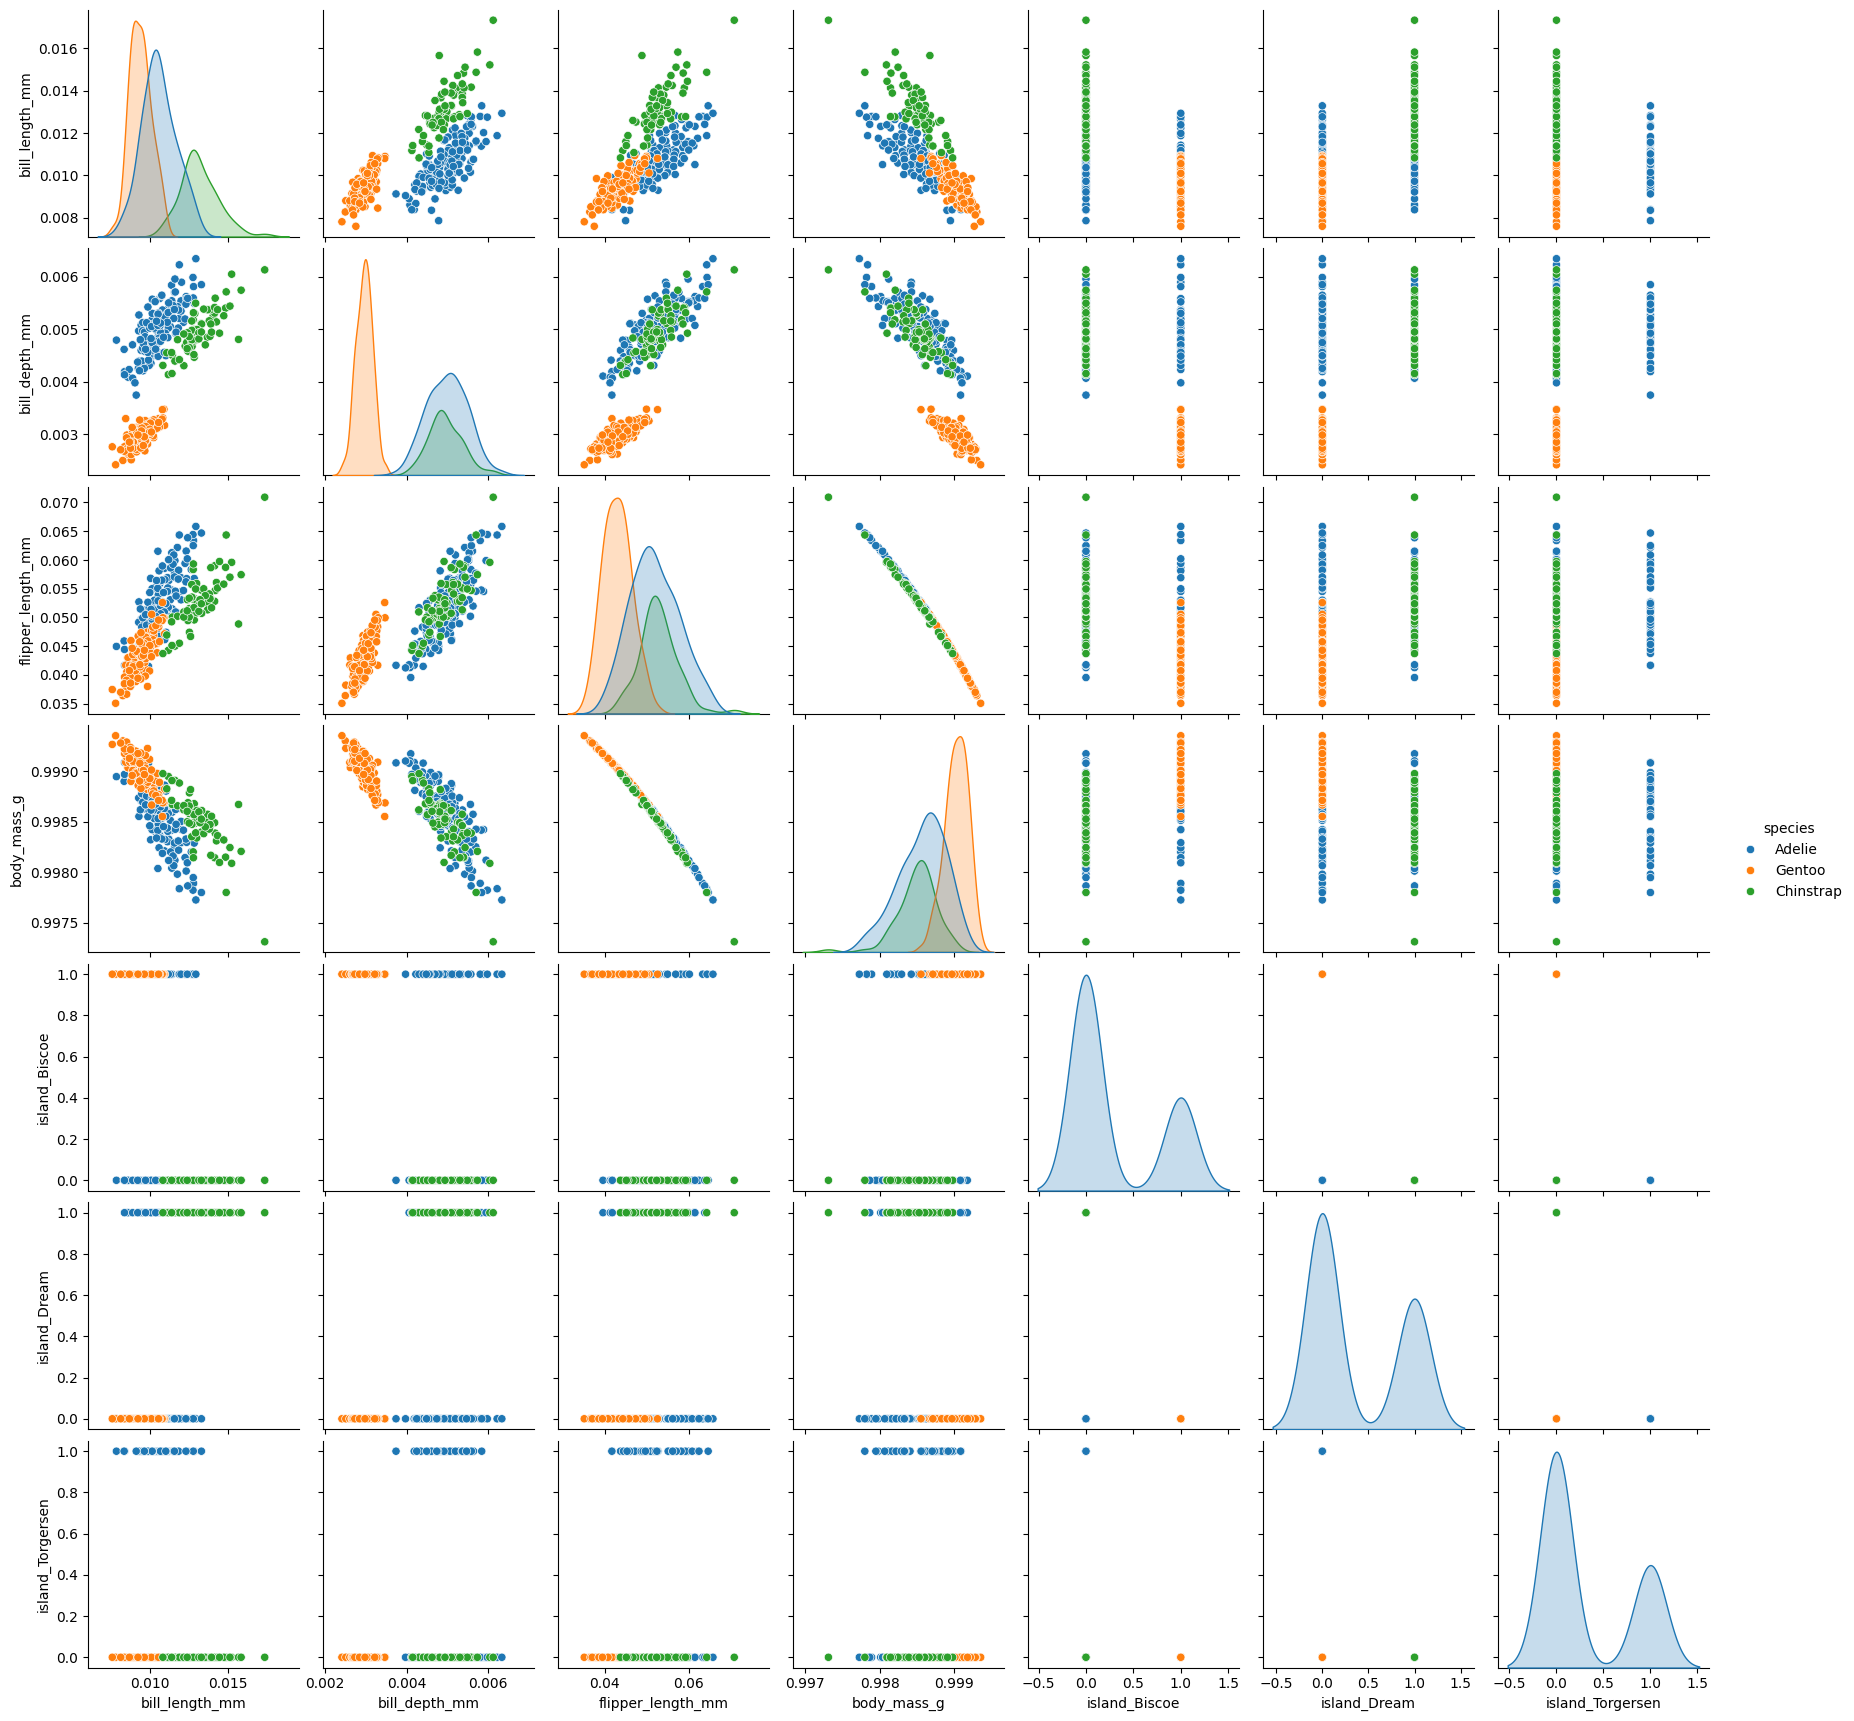

In [28]:
# Plot df with color by species
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, hue='species')
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = df.drop(columns=['species'])
target = df['species']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

acuracias = []

for k in range(1, 50, 4):
    knn = KNN(k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acuracias.append(accuracy_score(y_test, y_pred))

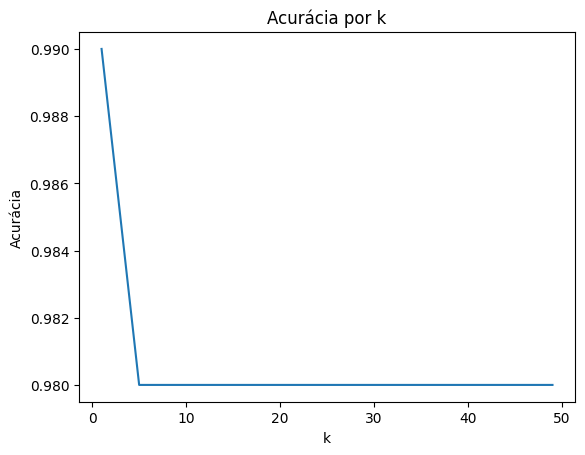

In [27]:
plt.plot(range(1, 50, 4), acuracias)
plt.xlabel('k')
plt.ylabel('Acurácia')
plt.title('Acurácia por k')
plt.show()

In [ ]:
data = df.drop(columns=['species'])
target = df['species']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

print(target.value_counts())

knn = KNN(15)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


Acuracia: 0.91
Precisão: 0.89
Recall: 0.94
F1: 0.91


<Axes: >

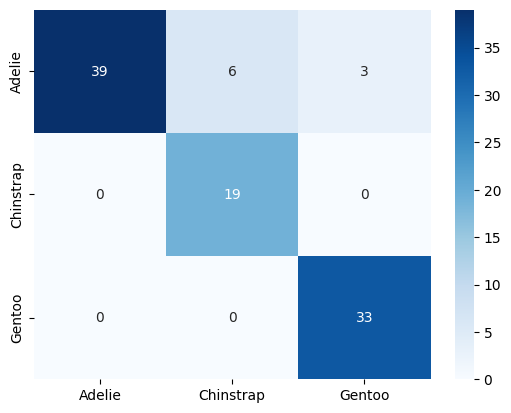

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
import seaborn as sns

print(f"Acuracia: {accuracy_score(y_test, predictions):.2f}")
print(f"Precisão: {precision_score(y_test, predictions, average='macro'):.2f}")
print(f"Recall: {recall_score(y_test, predictions, average='macro'):.2f}")
print(f"F1: {f1_score(y_test, predictions, average='macro'):.2f}")

# Matriz de confusão
cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm, index=['Adelie', 'Chinstrap', 'Gentoo'], columns=['Adelie', 'Chinstrap', 'Gentoo'])
sns.heatmap(cm, annot=True, cmap='Blues')